# Binary SVM on Spiral Data
Import the data and libraries.

           x1        x2  y
0    4.644970  4.427481  1
1    4.319527  4.427481  1
2    4.097633  4.580153  1
3    3.934911  4.790076  1
4    3.920118  5.114504  1
..        ...       ... ..
332  6.612426  2.709924  0
333  6.464497  2.538168  0
334  6.360947  2.366412  0
335  6.227811  2.309160  0
336  6.079882  2.232824  0

[337 rows x 3 columns]


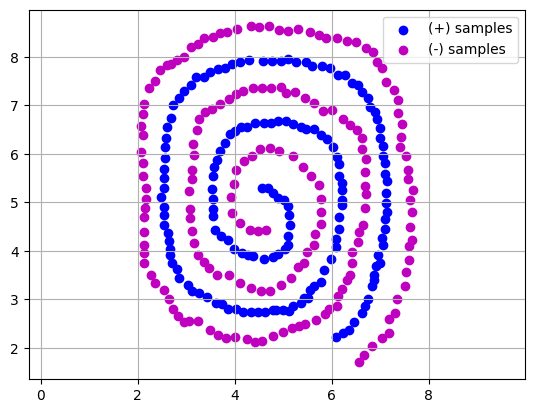

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df = pd.read_csv('spiral.csv')
print(df)
data = df.to_numpy()
X = data[:,:2]
y = data[:,2]

plt.scatter(X[np.where(y == 0),0],X[np.where(y == 0),1],color='b') # Plot positive samples
plt.scatter(X[np.where(y == 1),0],X[np.where(y == 1),1],color='m') # Plot negative samples
plt.legend(('(+) samples','(-) samples'))
plt.axis('equal')
plt.grid()
plt.show()

### Train the SVM binary classifier with Standard Scaling then report accuracy

In [2]:
model = make_pipeline(StandardScaler(),
                      SVC(C=1000,kernel='rbf',gamma=5)).fit(X,y)
print(f"accuracy = {model.score(X, y)}")
print('Confusion Matrix')
print(confusion_matrix(y, model.predict(X)))

accuracy = 1.0
Confusion Matrix
[[158   0]
 [  0 179]]


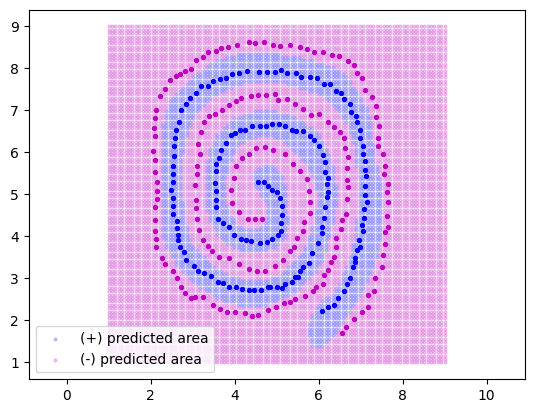

In [3]:
def visualizeRegion(axlim,model):
    nx, ny = (100,100)
    xv, yv = np.meshgrid(np.linspace(axlim[0],axlim[1],nx), 
                         np.linspace(axlim[2],axlim[3],ny))
    xv, yv = xv.reshape(-1,1), yv.reshape(-1,1)
    grid = np.hstack((xv,yv))
    ypred = model.predict(grid)
    plt.scatter(xv[np.where(ypred == 0)],yv[np.where(ypred == 0)],
                color='b', alpha=0.2, s=4,
                label='(+) predicted area')
    plt.scatter(xv[np.where(ypred == 1)],yv[np.where(ypred == 1)],
                color='m', alpha=0.2, s=4,
                label='(-) predicted area')
    plt.axis(axlim)
    
visualizeRegion(np.array([1, 9, 1, 9]),model)
plt.scatter(X[np.where(y == 0),0],X[np.where(y == 0),1], s=8, color='b') # Plot positive samples
plt.scatter(X[np.where(y == 1),0],X[np.where(y == 1),1], s=8, color='m') # Plot negative samples
plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

As we can see, Kernel SVM is a powerful classifier. It can learn nonlinear decision boundaries as intricate as the one in the example.

## Other ways to plot decision boundaries

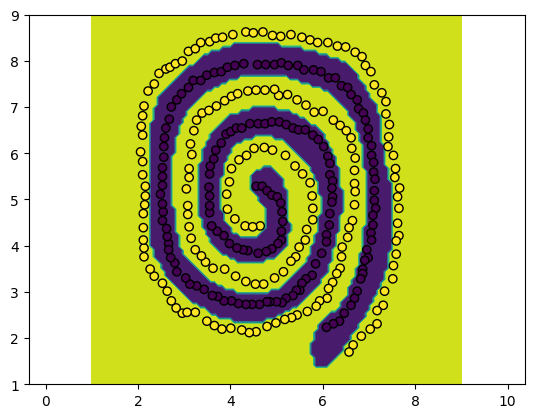

In [4]:
from sklearn.inspection import DecisionBoundaryDisplay

axlim = np.array([1, 9, 1, 9])
nx, ny = (100,100)
xv, yv = np.meshgrid(np.linspace(axlim[0],axlim[1],nx), 
                     np.linspace(axlim[2],axlim[3],ny))
grid = np.vstack([xv.ravel(), yv.ravel()]).T
ypred = np.reshape(model.predict(grid), xv.shape)
display = DecisionBoundaryDisplay(xx0=xv, xx1=yv, response=ypred)
display.plot()
display.ax_.scatter(X[:,0], X[:,1], c=y, edgecolor="k")
plt.axis('equal')
plt.show()

(1.5562130179999998, 8.162721893, 1.198473282, 9.125954198)

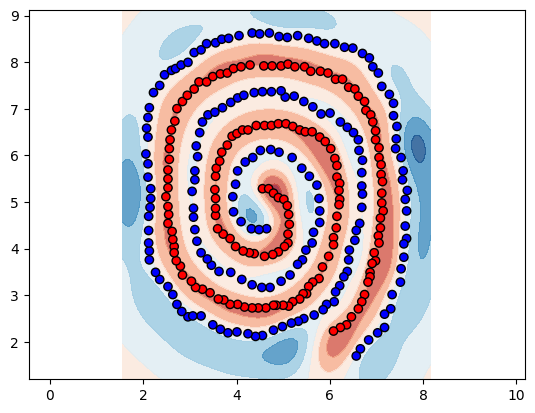

In [5]:
from matplotlib.colors import ListedColormap

DecisionBoundaryDisplay.from_estimator(model, X, cmap=plt.cm.RdBu, alpha=0.8, eps=0.5)
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
plt.axis('equal')